### Sophie Johnson
### Research Computing Fall 2021
# Forest Fire Fuel Emissions

In [13]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
import cartopy.crs as ccrs
import cartopy
import pooch

### Number of Forest Fires and Acres Burned over time

In [2]:
#https://www.nifc.gov/sites/default/files/document-media/TotalFires.pdf
file_name =  'FireCounts.xlsx.csv'

import pandas as pd
df = pd.read_csv(file_name, delimiter=',')
print(df.head(5))  # print first 5 rows of the dataframe

   Year  Fires     Acres
0  2020  58950  10122336
1  2019  50477   4664364
2  2018  58083   8767492
3  2017  71499  10026086
4  2016  67743   5509995


In [3]:
#When were the 5 years with the largest number of fires?
df.nlargest(5,'Fires')

,Year,Fires,Acres
14,2006,96385,9873745
24,1996,96363,6065998
21,1999,92487,5626093
20,2000,92250,7393493
28,1992,87394,2069929


In [4]:
#In contrast, when were the 5 years with the largest number of acres burned from fires?
df.nlargest(5,'Acres')

,Year,Fires,Acres
5,2015,68151,10125149
0,2020,58950,10122336
3,2017,71499,10026086
14,2006,96385,9873745
13,2007,85705,9328045


2015 was the first year on record that >10 million acres were burned: https://www.climatecentral.org/news/2015-wildfire-season-sets-ominous-record-19879
- "There were two common factors behind all these fires: they occurred in places that had a dry winter and warm temperatures during wildfire season."

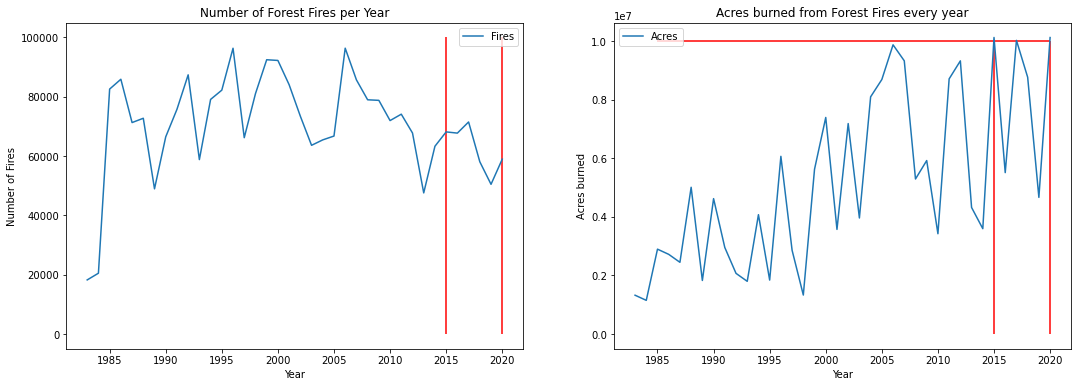

In [15]:
fig, ax = plt.subplots(ncols=2,figsize=(18,6))
ax0,ax1 = ax

df.plot(x='Year',y='Fires', ax=ax0)
ax0.set_title('Number of Forest Fires per Year')
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Fires')
ax0.vlines(2015, 0, 100000, color='red')
ax0.vlines(2020, 0, 100000, color='red')

df.plot(x='Year',y='Acres', ax=ax1)
ax1.set_title('Acres burned from Forest Fires every year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Acres burned')
ax1.hlines(1e7, 1985, 2020, color='red')
ax1.vlines(2015, 0, 1e7, color='red')
ax1.vlines(2020, 0, 1e7, color='red')


### Fire and Fuel Emissions from Fires

In [12]:
# first make sure lxml is installed
#pip install lxml
#pip install bs4
#pip install html5lib

import xarray as xr
from pydap.client import open_url
from pydap.cas.urs import setup_session

username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password

url = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/GEOS_CASAGFED_D_FIRE.3/GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc"

session = setup_session(username, password, check_url=url)
pydap_ds = open_url(url, session=session)
store = xr.backends.PydapDataStore(pydap_ds)
ds = xr.open_dataset(store)

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [3]:
fire_daily_2014 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2014.nc') 

fire_daily_2016 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2016.nc') 

fire_daily_2015 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc') 
fire_daily_2015

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, time: 365, bounds: 2)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2015-12-31T12:00:00
Dimensions without coordinates: bounds
Data variables:
    FIRE       (time, latitude, longitude) float32 ...
    FUEL       (time, latitude, longitude) float32 ...
    time_bds   (time, bounds) datetime64[ns] ...
Attributes: (12/24)
    Conventions:                    CF-1.7
    title:                          2015 GEOS-Carb CASA-GFED3 Daily Fire Emis...
    source:                         CASA-GFED3 Model using MERRA-2 meteorology
    contact:                        Lesley Ott Lesley.Ott@nasa.gov
    history:                        Files written by IDL
    institution:                    NASA Global Modeling and Assimilation Office
    ...                             ...
    ProductionDateTime:             Mon Jul 29 15:04:56 2019
    NorthernmostLatiude:            90.0
    WesternmostLongitude:           -180.0
    SouthernmostLatitude:           -90.0
    EasternmostLongitude:           180.0
    ProcessingLevel:                4

Text(0.5, 1.0, '2016 Time Mean of Fuel Emissions')

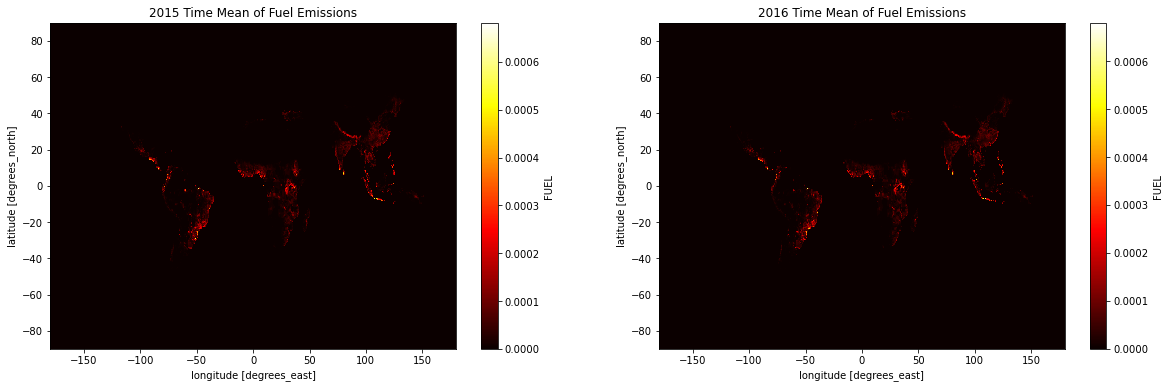

In [39]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

fire_daily_2015.FUEL.mean('time').plot(ax=ax0,cmap='hot')
ax0.set_title('2015 Time Mean of Fuel Emissions')

fire_daily_2016.FUEL.mean('time').plot(ax=ax1,cmap='hot')
ax1.set_title('2016 Time Mean of Fuel Emissions')

Text(0.5, 1.0, '2015 Time Mean of FIRE Emissions')

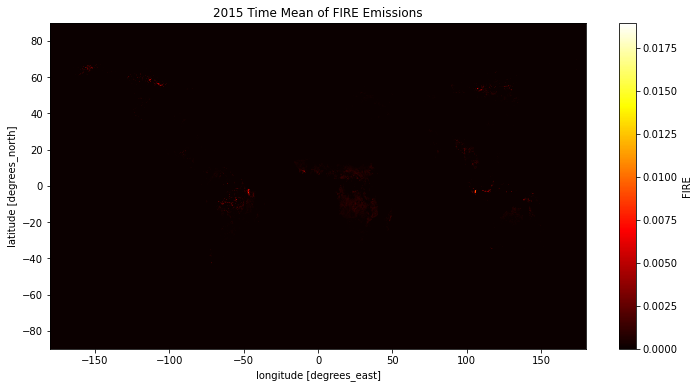

In [41]:
fire_daily_2015.FIRE.mean('time').plot(cmap='hot')
plt.title('2015 Time Mean of FIRE Emissions')

In [5]:
tmax = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.day.1991-2020.ltm.nc')

tmax_2014 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.2014.nc')
tmax_2015 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.2015.nc')
tmax_2015

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    Source:                          ftp://ftp.cpc.ncep.noaa.gov/precip/wd52w...
    version:                         V1.0
    title:                           CPC GLOBAL TEMP V1.0
    dataset_title:                   CPC GLOBAL TEMP
    history:                         Updated 2019-09-10 20:28:00
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    DODS_EXTRA.Unlimited_Dimension:  time

Text(0.5, 1.0, 'Time mean of Maximum Temperature 2015')

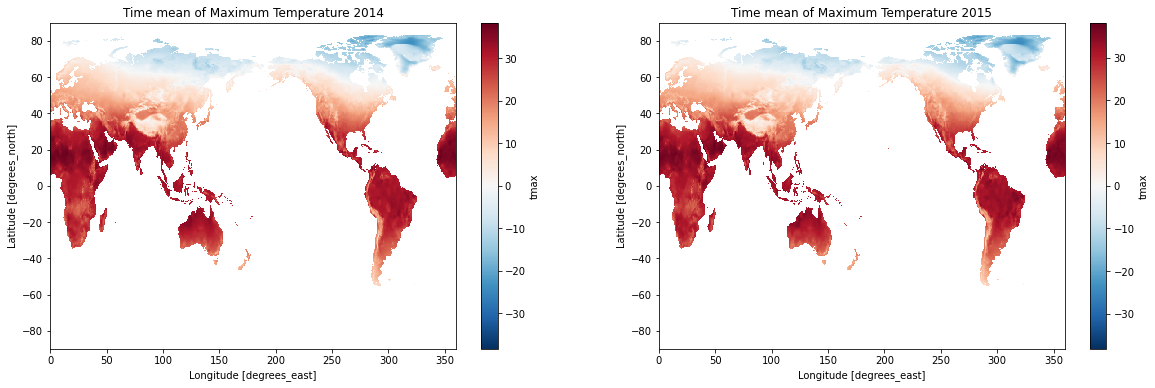

In [5]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

tmax_2014.tmax.mean('time').plot(ax=ax0)
ax0.set_title('Time mean of Maximum Temperature 2014')

tmax_2015.tmax.mean('time').plot(ax=ax1)
ax1.set_title('Time mean of Maximum Temperature 2015')


In [2]:
precip = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.day.1991-2020.ltm.nc')
#precip
precip_2015 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2015.nc')
precip_2014 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2014.nc')

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


Text(0.5, 1.0, 'Time mean of 2015 precipitation')

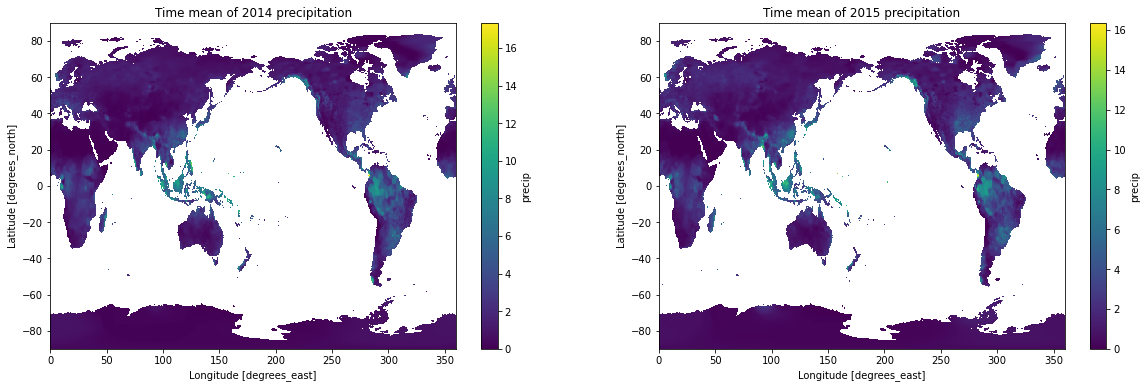

In [3]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

precip_2014.precip.mean('time').plot(ax=ax0)
ax0.set_title('Time mean of 2014 precipitation')

precip_2015.precip.mean('time').plot(ax=ax1)
ax1.set_title('Time mean of 2015 precipitation')


### Case Study: The Okanogan Complex Fire 
- Location: north-central Washington state. 
- Composed of 5 fires caused by lightning strikes on August 15, 2015, with two of the fires near Conconully merging days later on August 19.

Text(0.5, 1.0, 'Max Temperature near Okanogan County in 2015')

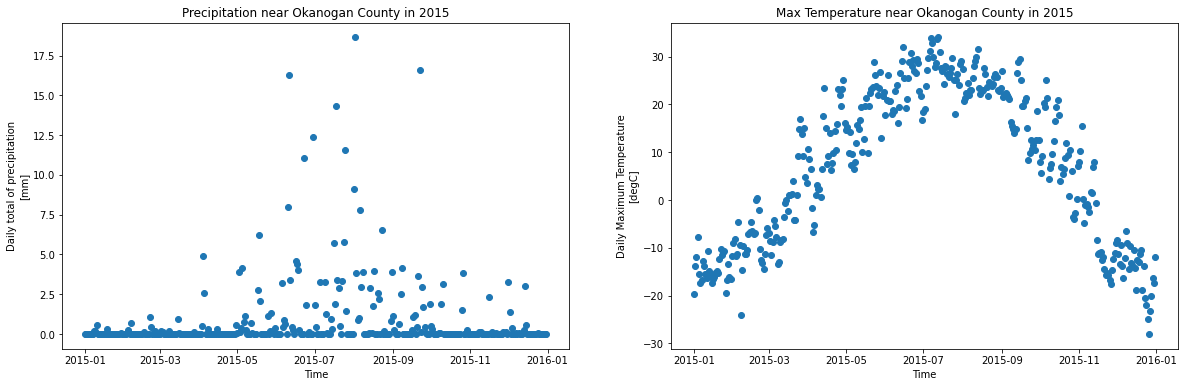

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

precip_2015.sel(lon=119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax0)
ax0.set_title('Precipitation near Okanogan County in 2015')

tmax_2015.sel(lon=119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax1)
ax1.set_title('Max Temperature near Okanogan County in 2015')

Text(0.5, 1.0, 'Max Temperature near Okanogan County in 2014')

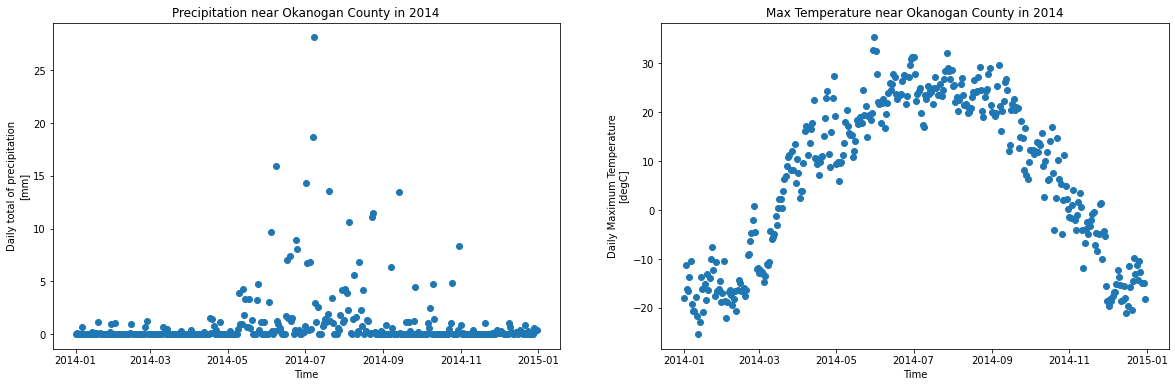

In [6]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

precip_2014.sel(lon=119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax0)
ax0.set_title('Precipitation near Okanogan County in 2014')

tmax_2014.sel(lon=119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax1)
ax1.set_title('Max Temperature near Okanogan County in 2014')

Text(0.5, 1.0, 'Fire Emissions near Okanogan County, WA in 2015')

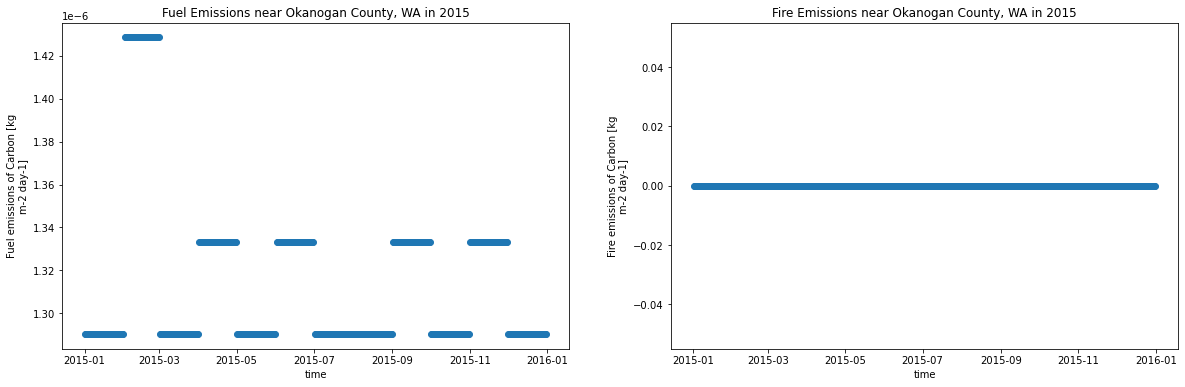

In [42]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

fire_daily_2015.sel(longitude=119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FUEL',ax=ax0)
ax0.set_title('Fuel Emissions near Okanogan County, WA in 2015')

fire_daily_2015.sel(longitude=119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FIRE',ax=ax1)
ax1.set_title('Fire Emissions near Okanogan County, WA in 2015')

--> Model of Carbon emissions from fire did not pick up the Okanogan Fire, despite it being a record setting wildfire.

### Correlations

In [5]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

Text(0.5, 1.0, '2015 Max Temperature Anomaly near Okanogan County, WA')

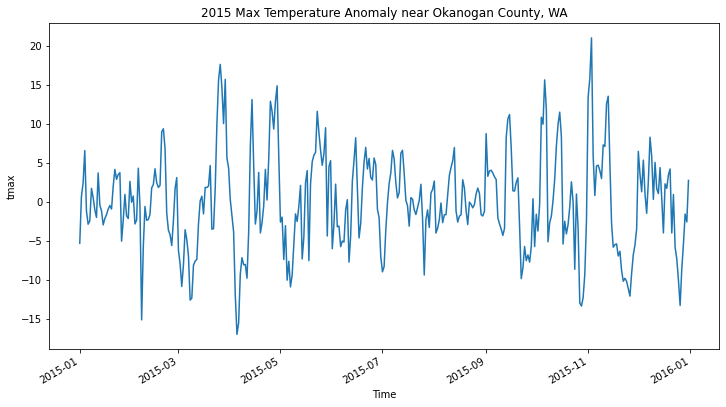

In [18]:
tmax_clim_15 = tmax_2015.tmax.groupby('time.month').mean(dim='time')
tmax_anom_15 = tmax_2015.tmax.groupby('time.month') - tmax_clim_15

#%matplotlib inline
#tmax_anom_15.sel(time='2017-07-03T00:00:00.000000000',method='nearest').plot()

#2015 Tmax anomaly near Okanogan County, WA
tmax_ref_15 = tmax_anom_15.sel(lon=119.0, lat=48.0, method='nearest')
tmax_ref_15.plot()
plt.title('2015 Max Temperature Anomaly near Okanogan County, WA')

Text(0.5, 1.0, '2015 Precipitation Anomaly near Okanogan County, WA')

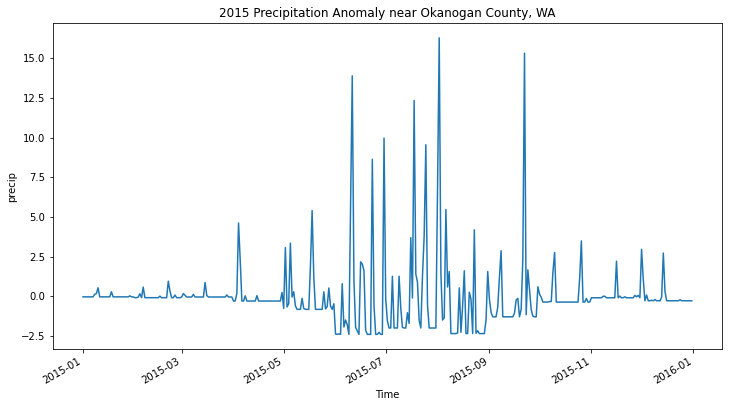

In [20]:
precip_clim_15 = precip_2015.precip.groupby('time.month').mean(dim='time')
precip_anom_15 = precip_2015.precip.groupby('time.month') - precip_clim_15

#%matplotlib inline
#tmax_anom_15.sel(time='2017-07-03T00:00:00.000000000',method='nearest').plot()

#2015 precip anomaly near Okanogan County, WA
precip_ref_15 = precip_anom_15.sel(lon=119.0, lat=48.0, method='nearest')
precip_ref_15.plot()
plt.title('2015 Precipitation Anomaly near Okanogan County, WA')

Text(0.5, 1.0, 'Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2015')

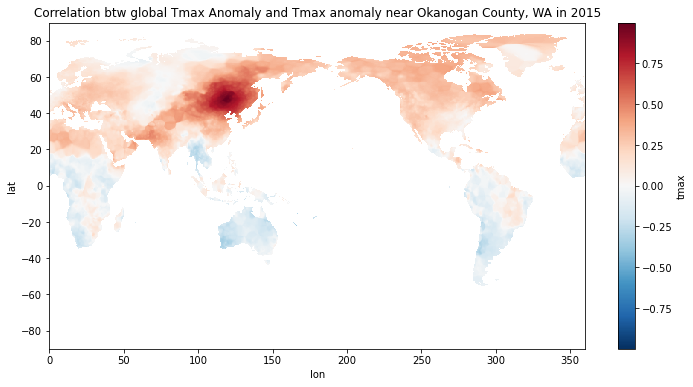

In [17]:
#2015 Tmax correlation
tmax_cor_15 = correlation(tmax_anom_15, tmax_ref_15, dims='time')
pc = tmax_cor_15.plot()
pc.axes.set_title('Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2015')

Text(0.5, 1.0, 'Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2015')

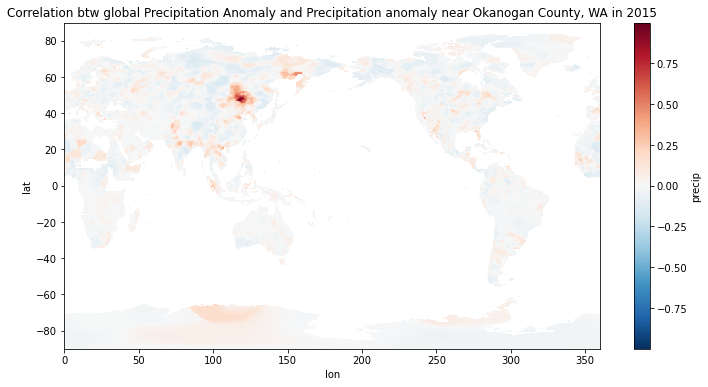

In [21]:
#2015 precip correlation
precip_cor_15 = correlation(precip_anom_15, precip_ref_15, dims='time')
pc2 = precip_cor_15.plot()
pc2.axes.set_title('Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2015')

In [15]:
username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password
url2 = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/CMSFluxFire.2/CMS_Flux_Fire_2016_v2.nc"

session2 = setup_session(username, password, check_url=url2)
pydap_ds = open_url(url2, session=session2)
store = xr.backends.PydapDataStore(pydap_ds)
ff = xr.open_dataset(store)

ValueError: unable to decode time units 'months since 2016-01-01T00:00:00' with 'the default calendar'. Try opening your dataset with decode_times=False or installing cftime if it is not installed.

### Copernicus fire data

Burning Index (dimensionless): "The Burning Index measures the difficulty of controlling a fire. It is derived from a combination of Spread component (how fast it will spread) and Energy release component (how much energy will be produced). In this way, it is related to flame length, which, in the Fire Behavior Prediction System, is based on rate of spread and heat per unit area. However, because of differences in the calculations for Burning index and flame length, they are not the same."

In [3]:
doi = "doi:10.5281/zenodo.5754302"
fname = "dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    processor=pooch.Unzip(),
    known_hash="md5:da758492fad4f0e6edba48b6fb32663f",
)
#file_path

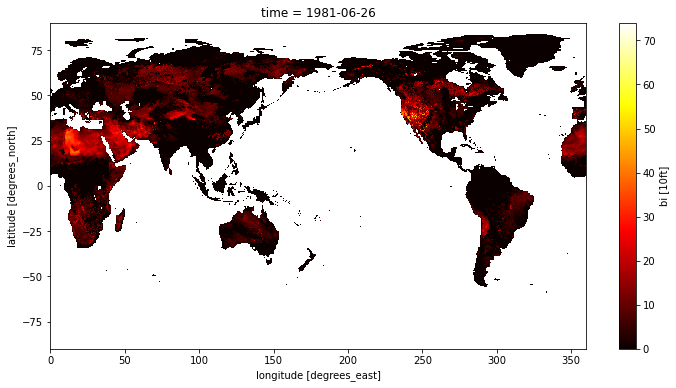

In [4]:
cpfd = xr.open_dataset(file_path[3333])
cpfd.bi.plot(cmap='hot')

In [71]:
cpfd

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-26
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    bi         (time, latitude, longitude) float64 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    history:           Fri Sep 27 14:07:10 2019: cdo -z zip_1 -remapbil,gridd...
    Conventions:       CF-1.6
    Reference date:    19810626
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...

In [9]:
def fetch_zipped_archive():
    """
    Load all files from a zipped archive.
    """
    fnames = GOODBOY.fetch("dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip", processor=Unzip())
    return fnames

In [10]:
fnames

NameError: name 'fnames' is not defined

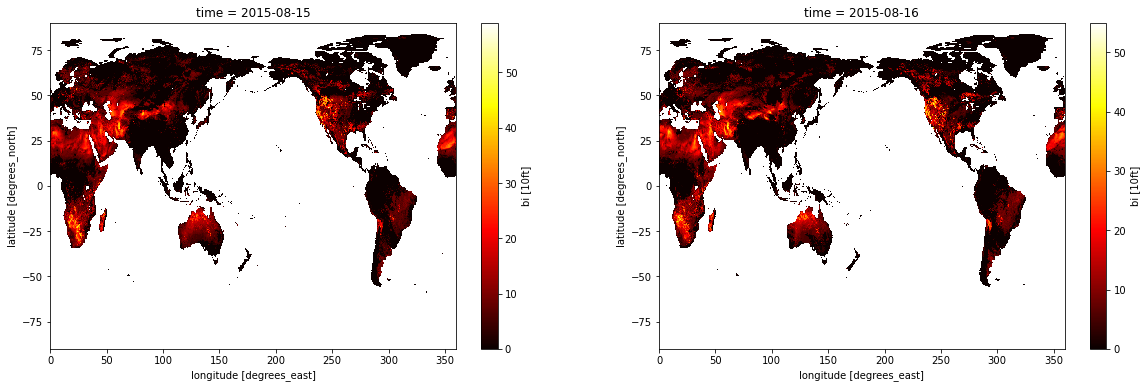

In [14]:
cpfd_occ = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150815_1200_hr_v3.0_con.nc')
cpfd_occ_1 = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150816_1200_hr_v3.0_con.nc')

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

cpfd_occ.bi.plot(ax=ax0,cmap='hot')
cpfd_occ_1.bi.plot(ax=ax1,cmap='hot')

Text(0.5, 1.0, 'Burning Index near Okanogan County, WA in 2015')

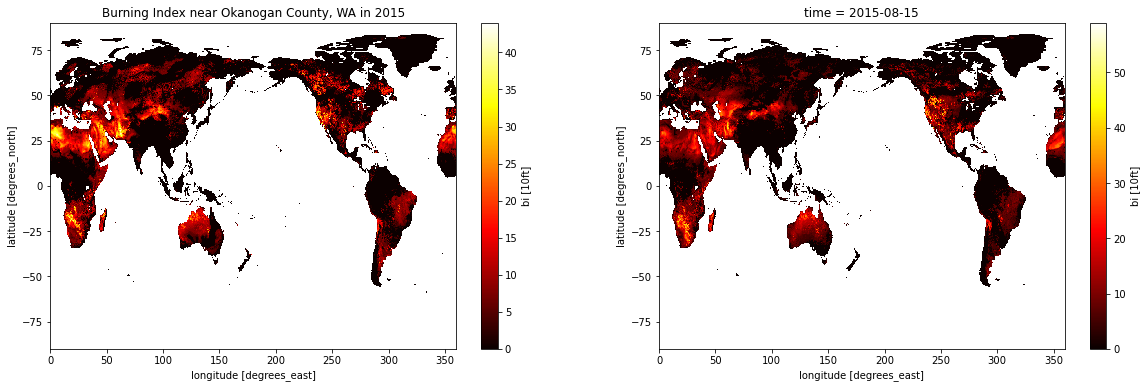

In [15]:
cpfd_occ_prev = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20140815_1200_hr_v3.0_con.nc')

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

#year before okanogan complex fire
cpfd_occ_prev.bi.plot(ax=ax0,cmap='hot')
ax0.set_title('Burning Index near Okanogan County, WA in 2014')

#year of okanogan complex fire
cpfd_occ.bi.plot(ax=ax1,cmap='hot')
ax0.set_title('Burning Index near Okanogan County, WA in 2015')


Text(0.5, 1.0, 'Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

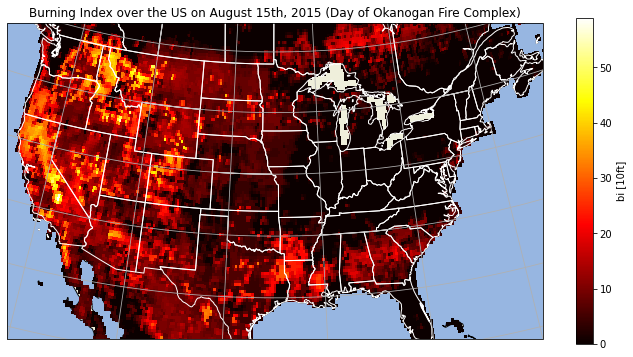

In [16]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

cpfd_occ.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

Text(0.5, 1.0, 'Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


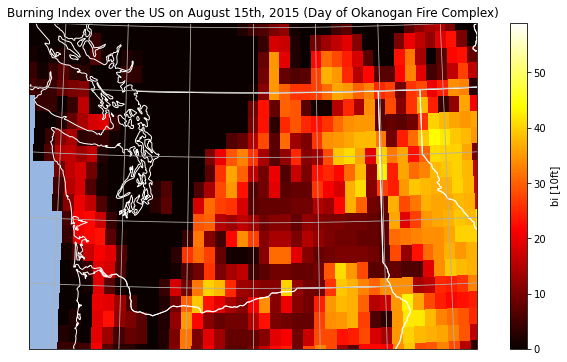

In [19]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 47.5
central_lon = -120
extent = [-125, -115, 45, 50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

cpfd_occ.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

Text(0.5, 1.0, 'Burning Index over the US on August 16th, 2015 (Day after Okanogan Fire Complex)')

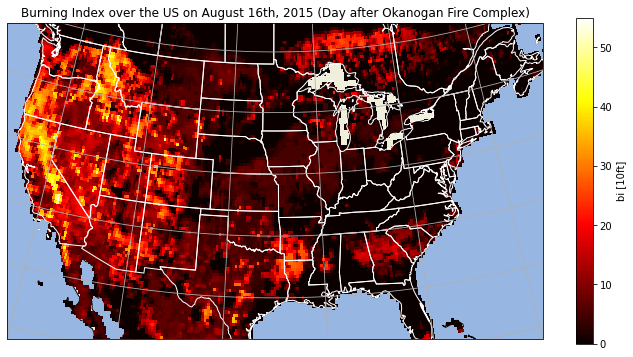

In [17]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

cpfd_occ_1.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 16th, 2015 (Day after Okanogan Fire Complex)')

Text(0.5, 1.0, 'Burning Index over the US on August 15th, 2014 (Year before Okanogan Fire Complex)')

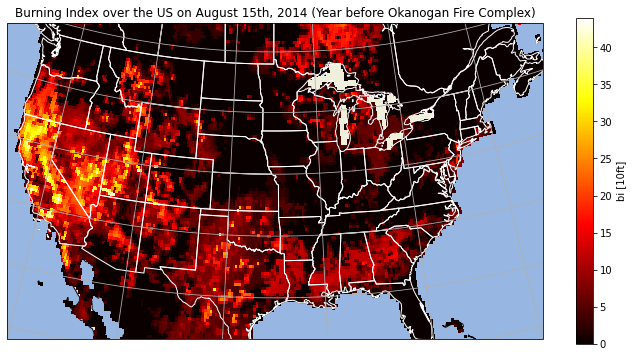

In [18]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

cpfd_occ_prev.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 15th, 2014 (Year before Okanogan Fire Complex)')

The year before the Okanogan fire complex, the burning index scale only goes up to 40, compared to 50 in 2015.